In [167]:
import pandas as pd
from preprocessing.country_and_airports_codes import compute_lon_lat,group_and_rename_countries, group_and_rename_airports, group_and_rename_aircraft_types
from preprocessing.encoding import one_hot_encoding,string_to_value_count, string_to_int_hashing
from preprocessing.local_time import add_localtime_to_train_and_test

In [168]:
train_df = pd.read_csv("./data/challenge_set.csv")
test_df = pd.read_csv("./data/submission_set.csv")

display(train_df.head())
display(test_df.head())

,flight_id,date,callsign,adep,name_adep,country_code_adep,ades,name_ades,country_code_ades,actual_offblock_time,arrival_time,aircraft_type,wtc,airline,flight_duration,taxiout_time,flown_distance,tow
0,248763780,2022-01-01,3840d84f25d3f5fcc0a1be3076bb4039,EGLL,London Heathrow,GB,EICK,Cork,IE,2022-01-01T13:46:00Z,2022-01-01T15:04:56Z,A320,M,a73f82288988b79be490c6322f4c32ed,61,18,321,54748.000000
1,248760618,2022-01-01,f6f610e73002b8892a239a81321f7f1d,LEBL,Barcelona,ES,KMIA,Miami,US,2022-01-01T09:55:00Z,2022-01-01T19:37:56Z,B772,H,5543e4dc327359ffaf5b9c0e6faaf0e1,570,13,4193,185441.000000
2,248753824,2022-01-01,139670936660762c230ca92556ba842b,ESSA,Stockholm Arlanda,SE,KORD,Chicago O'Hare,US,2022-01-01T09:39:00Z,2022-01-01T19:08:13Z,A333,H,8be5c854fd664bcb97fb543339f74770,554,15,3770,230396.000000
3,248753852,2022-01-01,509dc61bb54fbab0e5406067c95603e2,LSZH,Zurich,CH,KPHL,Philadelphia,US,2022-01-01T11:04:00Z,2022-01-01T19:32:13Z,B788,H,5543e4dc327359ffaf5b9c0e6faaf0e1,497,11,3607,157615.000000
4,248755934,2022-01-01,d0610d000dcf26b1d7bba8103ecc393d,EIDW,Dublin,IE,EGLL,London Heathrow,GB,2022-01-01T12:36:00Z,2022-01-01T13:44:32Z,A21N,M,a73f82288988b79be490c6322f4c32ed,55,14,305,70318.447226


,flight_id,date,callsign,adep,name_adep,country_code_adep,ades,name_ades,country_code_ades,actual_offblock_time,arrival_time,aircraft_type,wtc,airline,flight_duration,taxiout_time,flown_distance,tow
0,248753821,2022-01-01,3b3de0f3ad0ee192513995c02f7bf7cf,LTFJ,Istanbul Sabiha Gokcen,TR,LFLL,Lyon,FR,2022-01-01T09:44:00Z,2022-01-01T12:48:33Z,B738,M,6351ec1b849adacc0cbb3b1313d8d39b,170,15,1122,NaN
1,248753822,2022-01-01,e06dd03d4a879ca37d9e18c1bd7cad16,EBBR,Brussels,BE,KJFK,New York JFK,US,2022-01-01T09:45:00Z,2022-01-01T17:49:51Z,A333,H,bdeeef3a675587d530de70a25d7118d2,470,15,3205,NaN
2,248754498,2022-01-01,2d3b1c962c78c4ebeef11bcd51b9e94c,KMIA,Miami,US,EGLL,London Heathrow,GB,2022-01-01T01:52:00Z,2022-01-01T09:55:16Z,B77W,H,5543e4dc327359ffaf5b9c0e6faaf0e1,473,10,3965,NaN
3,248763650,2022-01-01,35f7721f68bf85128195547ae38b0f04,EBBR,Brussels,BE,LEAL,Alicante,ES,2022-01-01T12:02:00Z,2022-01-01T14:13:56Z,B738,M,f53c55b5cf0cbb3be755bf50df6fa52d,123,9,802,NaN
4,248763651,2022-01-01,eb56918bee9bc5204624186b9bcc4391,LSZH,Zurich,CH,LFPG,Paris Charles de Gaulle,FR,2022-01-01T12:03:00Z,2022-01-01T13:09:44Z,BCS3,M,2d5def0a5a844b343ba1b7cc9cb28fa9,56,11,292,NaN


In [169]:
add_localtime_to_train_and_test(train_df,test_df) #add localtime features (departures & arrival hours, day of years, weeks, month)
compute_lon_lat(train_df, test_df) # computes lon, lat for each airport
group_and_rename_countries(train_df, test_df) # simplify country_codes by group and rename countries
group_and_rename_airports(train_df, test_df) # simplify airport codes by group and rename airport
group_and_rename_aircraft_types(train_df, test_df) #regroup less used airlines and create "XXXX" category for unknown ones.

train_df.to_csv("./data/preprocessed_challenge_set.csv")
test_df.to_csv("./data/preprocessed_submission_set.csv")

# drop unusefull column:
to_drop = ['flight_id','date','name_adep','name_ades','name_adep','actual_offblock_time','arrival_time','local_departure_time','local_arrival_time']
train_df = train_df.drop(columns= to_drop)
test_df = test_df.drop(columns= to_drop)

display(train_df.head())
display(test_df.head())

----------------------------------------------------------------------------------------------------
Columns for lon & lat: ['lon_adep', 'lat_adep', 'lon_ades', 'lat_ades'] successfully created !
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Country codes successfully grouped ! Different codes left : 47
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Airports codes successfully grouped ! Different codes left : 155
----------------------------------------------------------------------------------------------------


,flight_id,date,callsign,adep,name_adep,country_code_adep,ades,name_ades,country_code_ades,actual_offblock_time,...,local_departure_time,local_arrival_hour,local_departure_hour,travel_day_of_week,travel_day_of_year,departure_month,lon_adep,lat_adep,lon_ades,lat_ades
0,248763780,2022-01-01,3840d84f25d3f5fcc0a1be3076bb4039,EGLL,London Heathrow,GB,EICK,Cork,IE,2022-01-01T13:46:00Z,...,2022-01-01 13:46:00,15,13,5,1,1,-0.46194,51.4706,-8.49111,51.84130
1,248760618,2022-01-01,f6f610e73002b8892a239a81321f7f1d,LEBL,Barcelona,ES,KMIA,Miami,US,2022-01-01T09:55:00Z,...,2022-01-01 10:55:00,14,10,5,1,1,2.07846,41.2971,-80.29012,25.79536
2,248753824,2022-01-01,139670936660762c230ca92556ba842b,ESSA,Stockholm Arlanda,SE,KORD,Chicago O'Hare,US,2022-01-01T09:39:00Z,...,2022-01-01 10:39:00,13,10,5,1,1,17.91860,59.6519,-87.90815,41.97694
3,248753852,2022-01-01,509dc61bb54fbab0e5406067c95603e2,LSZH,Zurich,CH,KPHL,Philadelphia,US,2022-01-01T11:04:00Z,...,2022-01-01 12:04:00,14,12,5,1,1,8.54917,47.4647,-75.24066,39.87208
4,248755934,2022-01-01,d0610d000dcf26b1d7bba8103ecc393d,EIDW,Dublin,IE,EGLL,London Heathrow,GB,2022-01-01T12:36:00Z,...,2022-01-01 12:36:00,13,12,5,1,1,-6.27007,53.4213,-0.46194,51.47060


,flight_id,date,callsign,adep,name_adep,country_code_adep,ades,name_ades,country_code_ades,actual_offblock_time,...,local_departure_time,local_arrival_hour,local_departure_hour,travel_day_of_week,travel_day_of_year,departure_month,lon_adep,lat_adep,lon_ades,lat_ades
0,248753821,2022-01-01,3b3de0f3ad0ee192513995c02f7bf7cf,LTFJ,Istanbul Sabiha Gokcen,TR,LFLL,Lyon,FR,2022-01-01T09:44:00Z,...,2022-01-01 12:44:00,13,12,5,1,1,29.30920,40.89860,5.09083,45.72640
1,248753822,2022-01-01,e06dd03d4a879ca37d9e18c1bd7cad16,EBBR,Brussels,BE,KJFK,New York JFK,US,2022-01-01T09:45:00Z,...,2022-01-01 10:45:00,12,10,5,1,1,4.48444,50.90140,-73.77869,40.63993
2,248754498,2022-01-01,2d3b1c962c78c4ebeef11bcd51b9e94c,KMIA,Miami,US,EGLL,London Heathrow,GB,2022-01-01T01:52:00Z,...,2021-12-31 20:52:00,9,20,5,1,1,-80.29012,25.79536,-0.46194,51.47060
3,248763650,2022-01-01,35f7721f68bf85128195547ae38b0f04,EBBR,Brussels,BE,LEAL,Alicante,ES,2022-01-01T12:02:00Z,...,2022-01-01 13:02:00,15,13,5,1,1,4.48444,50.90140,-0.55816,38.28220
4,248763651,2022-01-01,eb56918bee9bc5204624186b9bcc4391,LSZH,Zurich,CH,LFPG,Paris Charles de Gaulle,FR,2022-01-01T12:03:00Z,...,2022-01-01 13:03:00,14,13,5,1,1,8.54917,47.46470,2.55000,49.01280


In [170]:
train_df = pd.read_csv("./data/preprocessed_challenge_set.csv",index_col=0)
test_df = pd.read_csv("./data/preprocessed_submission_set.csv",index_col=0)

In [171]:
# encoding

columns_to_ohe = [] # A changer
one_hot_encoding(train_df, test_df, columns_to_ohe)

columns_to_hash = [] # A changer
string_to_int_hashing(train_df, test_df, columns_to_hash)

columns_to_vc = ['callsign','country_code_ades', 'country_code_adep', 'adep', 'ades', 'airline','aircraft_type','wtc'] # A changer
string_to_value_count(train_df, test_df, columns_to_vc)

----------------------------------------------------------------------------------------------------
Columns [] sucessfully one hot encoded !
----------------------------------------------------------------------------------------------------
        flight_id        date                          callsign  adep  \
0       248753821  2022-01-01  3b3de0f3ad0ee192513995c02f7bf7cf  LTFJ   
1       248753822  2022-01-01  e06dd03d4a879ca37d9e18c1bd7cad16  EBBR   
2       248754498  2022-01-01  2d3b1c962c78c4ebeef11bcd51b9e94c  KMIA   
3       248763650  2022-01-01  35f7721f68bf85128195547ae38b0f04  EBBR   
4       248763651  2022-01-01  eb56918bee9bc5204624186b9bcc4391  LSZH   
...           ...         ...                               ...   ...   
158144  258068876  2022-12-31  c9fca302ca2e28acab0eb0bb1b46f11b  LTFM   
158145  258064675  2022-12-31  00f96ad0e382476649574ba044c764fc  EHAM   
158146  258065436  2022-12-31  87c552b7f6d9bbd16a66e95df761c7f2  LEBL   
158147  258058138  2022-12-

In [172]:
# drop unusefull column:
to_drop = ['flight_id','date','name_adep','name_ades','name_adep','actual_offblock_time','arrival_time','local_departure_time','local_arrival_time']
train_df = train_df.drop(columns= to_drop)
test_df = test_df.drop(columns= to_drop)

In [173]:
display(train_df)
display(test_df)

,callsign,adep,country_code_adep,ades,country_code_ades,aircraft_type,wtc,airline,flight_duration,taxiout_time,...,tow,local_arrival_hour,local_departure_hour,travel_day_of_week,travel_day_of_year,departure_month,lon_adep,lat_adep,lon_ades,lat_ades
0,1301,7,1,60,9,0,0,4,61,18,...,54748.000000,15,13,5,1,1,-0.46194,51.47060,-8.49111,51.84130
1,53,24,11,47,10,12,1,6,570,13,...,185441.000000,14,10,5,1,1,2.07846,41.29710,-80.29012,25.79536
2,1151,6,7,29,10,7,1,1,554,15,...,230396.000000,13,10,5,1,1,17.91860,59.65190,-87.90815,41.97694
3,108,3,4,39,10,14,1,6,497,11,...,157615.000000,14,12,5,1,1,8.54917,47.46470,-75.24066,39.87208
4,38,5,10,7,1,5,0,4,55,14,...,70318.447226,13,12,5,1,1,-6.27007,53.42130,-0.46194,51.47060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369008,1487,11,13,47,10,14,1,6,545,21,...,163438.000000,14,10,5,365,12,2.55000,49.01280,-80.29012,25.79536
369009,2434,0,0,14,3,5,0,0,158,25,...,78707.000000,13,12,5,365,12,28.75200,41.27533,13.50067,52.36217
369010,94,18,3,5,9,0,0,4,99,11,...,62942.750000,11,10,5,365,12,6.76678,51.28950,-6.27007,53.42130
369011,19,11,13,5,9,5,0,4,84,12,...,72611.161024,11,10,5,365,12,2.55000,49.01280,-6.27007,53.42130


,callsign,adep,country_code_adep,ades,country_code_ades,aircraft_type,wtc,airline,flight_duration,taxiout_time,...,tow,local_arrival_hour,local_departure_hour,travel_day_of_week,travel_day_of_year,departure_month,lon_adep,lat_adep,lon_ades,lat_ades
0,2941.0,9.0,0.0,53.0,12.0,2,0,0.0,170,15,...,NaN,13,12,5,1,1,29.30920,40.89860,5.09083,45.72640
1,216.0,4.0,8.0,17.0,10.0,7,1,5.0,470,15,...,NaN,12,10,5,1,1,4.48444,50.90140,-73.77869,40.63993
2,18.0,46.0,9.0,7.0,1.0,11,1,6.0,473,10,...,NaN,9,20,5,1,1,-80.29012,25.79536,-0.46194,51.47060
3,4986.0,4.0,8.0,33.0,11.0,2,0,10.0,123,9,...,NaN,15,13,5,1,1,4.48444,50.90140,-0.55816,38.28220
4,533.0,3.0,4.0,11.0,12.0,9,0,3.0,56,11,...,NaN,14,13,5,1,1,8.54917,47.46470,2.55000,49.01280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158144,2716.0,0.0,0.0,4.0,4.0,3,0,0.0,154,25,...,NaN,13,12,5,365,12,28.75200,41.27533,8.54917,47.46470
158145,2879.0,12.0,15.0,13.0,3.0,0,0,15.0,42,9,...,NaN,11,11,5,365,12,4.76389,52.30860,8.54313,50.02640
158146,130.0,24.0,11.0,17.0,10.0,12,1,6.0,483,14,...,NaN,12,10,5,365,12,2.07846,41.29710,-73.77869,40.63993
158147,3378.0,68.0,12.0,1.0,2.0,4,0,2.0,55,15,...,NaN,11,10,5,365,12,11.28870,44.53540,16.56970,48.11030


In [174]:
X = train_df.drop(columns=["tow"])
y= train_df["tow"]

display(X)
display(y)

,callsign,adep,country_code_adep,ades,country_code_ades,aircraft_type,wtc,airline,flight_duration,taxiout_time,flown_distance,local_arrival_hour,local_departure_hour,travel_day_of_week,travel_day_of_year,departure_month,lon_adep,lat_adep,lon_ades,lat_ades
0,1301,7,1,60,9,0,0,4,61,18,321,15,13,5,1,1,-0.46194,51.47060,-8.49111,51.84130
1,53,24,11,47,10,12,1,6,570,13,4193,14,10,5,1,1,2.07846,41.29710,-80.29012,25.79536
2,1151,6,7,29,10,7,1,1,554,15,3770,13,10,5,1,1,17.91860,59.65190,-87.90815,41.97694
3,108,3,4,39,10,14,1,6,497,11,3607,14,12,5,1,1,8.54917,47.46470,-75.24066,39.87208
4,38,5,10,7,1,5,0,4,55,14,305,13,12,5,1,1,-6.27007,53.42130,-0.46194,51.47060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369008,1487,11,13,47,10,14,1,6,545,21,4046,14,10,5,365,12,2.55000,49.01280,-80.29012,25.79536
369009,2434,0,0,14,3,5,0,0,158,25,946,13,12,5,365,12,28.75200,41.27533,13.50067,52.36217
369010,94,18,3,5,9,0,0,4,99,11,522,11,10,5,365,12,6.76678,51.28950,-6.27007,53.42130
369011,19,11,13,5,9,5,0,4,84,12,466,11,10,5,365,12,2.55000,49.01280,-6.27007,53.42130


0          54748.000000
1         185441.000000
2         230396.000000
3         157615.000000
4          70318.447226
              ...      
369008    163438.000000
369009     78707.000000
369010     62942.750000
369011     72611.161024
369012    195373.000000
Name: tow, Length: 369013, dtype: float64

In [175]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from xgboost import plot_importance


RMSE: 3368.622735509851


c:\Users\Eymeric\Desktop\Avion\.conda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

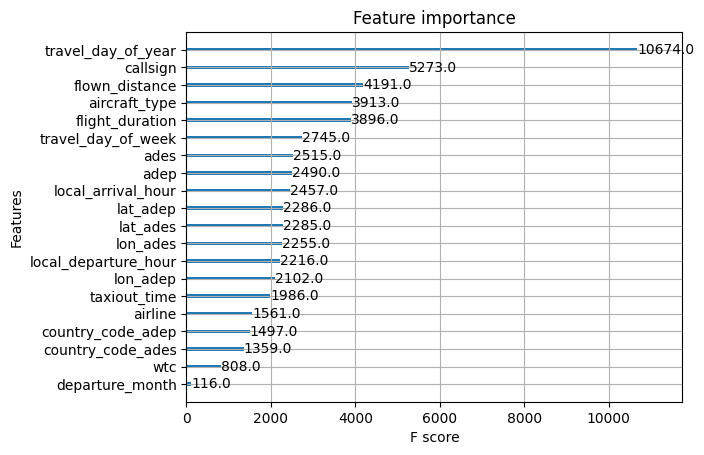

In [176]:
# split train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# rmse objective
model = XGBRegressor(objective='reg:squarederror',n_estimators=1000,learning_rate=0.1,max_depth=6)
model.fit(X_train, y_train)

# model analysis
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred,squared=False)

print(f"RMSE: {rmse}")

# features importance



plot_importance(model)








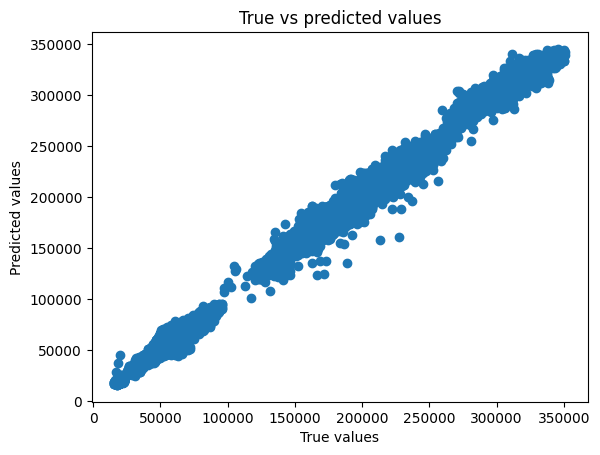

In [177]:
# plot the results on the test set vs the true values

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("True values")

plt.ylabel("Predicted values")
plt.title("True vs predicted values")

plt.show()



Average relative error: 0.031248305680172457
Average absolute error: 2246.6729339830536


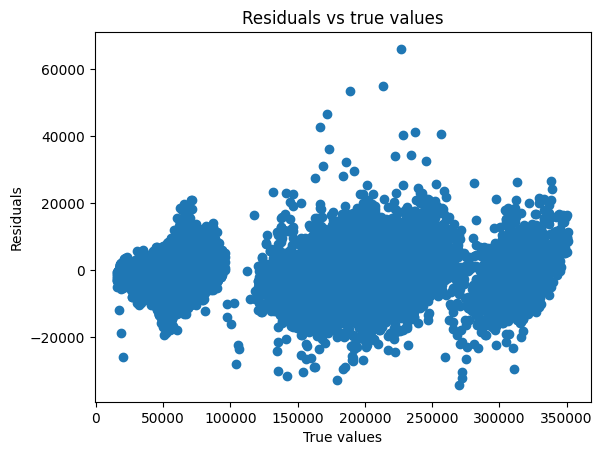

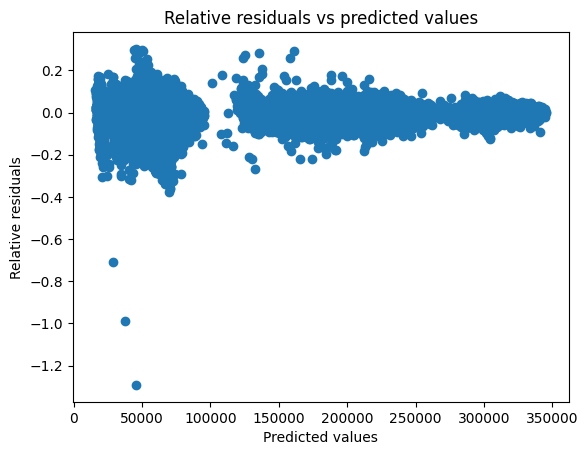

In [178]:
# compute average relative error

relative_error = abs(y_test - y_pred) / y_test

average_relative_error = relative_error.mean()

print(f"Average relative error: {average_relative_error}")

# compute average absolute error

absolute_error = abs(y_test - y_pred)

average_absolute_error = absolute_error.mean()

print(f"Average absolute error: {average_absolute_error}")

# plot residuals vs true values

plt.scatter(y_test, (y_test-y_pred))

plt.xlabel("True values")

plt.ylabel("Residuals")

plt.title("Residuals vs true values")

plt.show()

# plot residuals vs predicted values

plt.scatter(y_pred, (y_test-y_pred)/y_test)

plt.xlabel("Predicted values")

plt.ylabel("Relative residuals")

plt.title("Relative residuals vs predicted values")

plt.show()



In [179]:
# grid search on xgb hyperparameters

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

#grid_search.fit(X_train, y_train)

#print(grid_search.best_params_)



RMSE: 3158.4065181001542


c:\Users\Eymeric\Desktop\Avion\.conda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

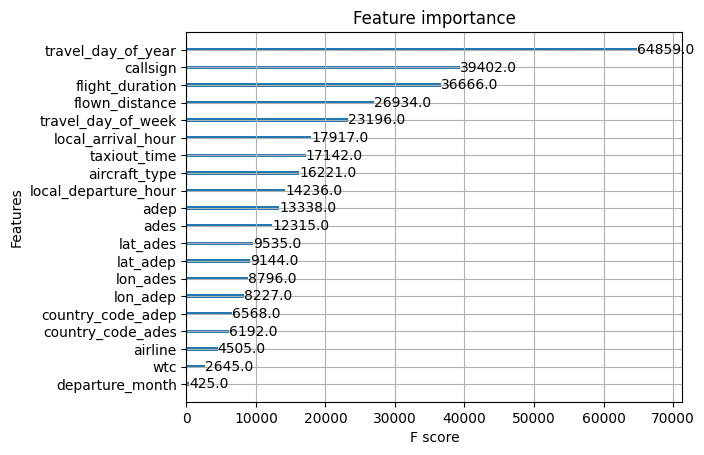

In [180]:
# retrain the model with the best hyperparameters

model = XGBRegressor(objective='reg:squarederror',n_estimators=1000,learning_rate=0.1,max_depth=9)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred,squared=False)

print(f"RMSE: {rmse}")

# features importance

plot_importance(model)




In [181]:
# number of line in x_train for which wtc is 1

print(X_test[X_test['wtc'] == 1].shape[0])

# number of line in x_train for which wtc is 0

print(X_test[X_test['wtc'] == 0].shape[0])

# number of entry in y_train inferior to 100000

print(y_test[y_test >= 100000].shape[0])

15566
95138
15564


In [202]:
# split the train dataset between wtc = 0 et wtc = 1

X_train_wtc_0 = X_train[X_train['wtc'] == 0]

X_train_wtc_1 = X_train[X_train['wtc'] == 1]

y_train_wtc_0 = y_train[X_train['wtc'] == 0]

y_train_wtc_1 = y_train[X_train['wtc'] == 1]

# train a model for wtc = 0

model_wtc_0 = XGBRegressor(objective='reg:squarederror',n_estimators=1000,learning_rate=0.05,max_depth=10, min_child_weight=1, gamma=0, colsample_bytree=0.8, reg_alpha=0.005)

model_wtc_0.fit(X_train_wtc_0, y_train_wtc_0)

# train a model for wtc = 1

model_wtc_1 = XGBRegressor(objective='reg:squarederror',n_estimators=1000,learning_rate=0.1,max_depth=9)

model_wtc_1.fit(X_train_wtc_1, y_train_wtc_1)

# train a global model

model = XGBRegressor(objective='reg:squarederror',n_estimators=1000,learning_rate=0.1,max_depth=9)

model.fit(X_train, y_train)


# aggregate the model to predict with wtc_1 when wtc = 1 and wtc_0 when wtc = 0

y_pred_wtc_0 = model_wtc_0.predict(X_test)

y_pred_wtc_1 = model_wtc_1.predict(X_test)

y_pred = model.predict(X_test)



y_pred_aggregate = y_pred_wtc_0 * (X_test['wtc'] == 0) + y_pred_wtc_1 * (X_test['wtc'] == 1) #+ y_pred)/2

rmse = mean_squared_error(y_test, y_pred,squared=False)

print(f"RMSE: {rmse}")



RMSE: 3158.4065181001542


c:\Users\Eymeric\Desktop\Avion\.conda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


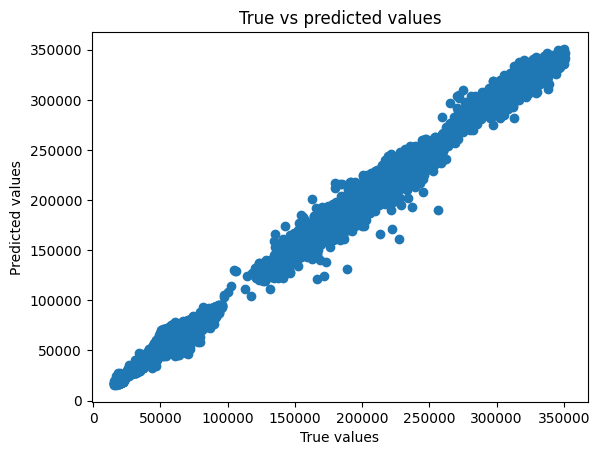

Average relative error: 0.027588337491477172
Average absolute error: 2018.1928597748552


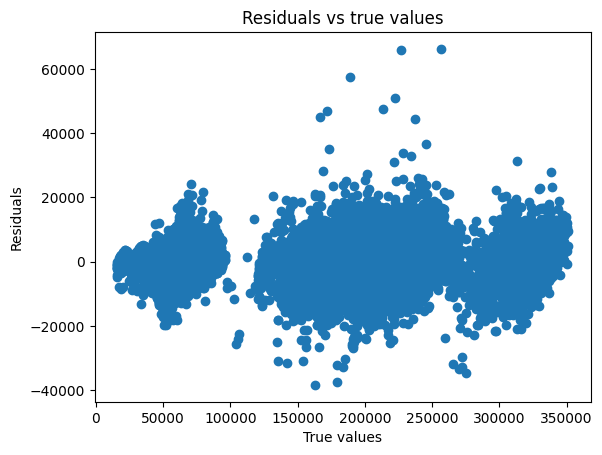

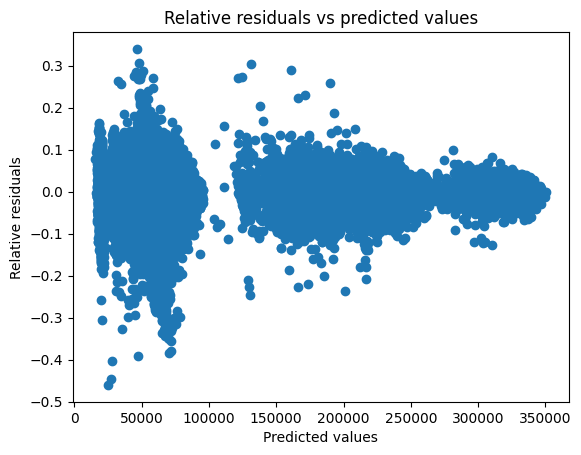

In [203]:
# plot the results on the test set vs the true values

plt.scatter(y_test, y_pred)

plt.xlabel("True values")

plt.ylabel("Predicted values")

plt.title("True vs predicted values")

plt.show()

# compute average relative error

relative_error = abs(y_test - y_pred) / y_test

average_relative_error = relative_error.mean()

print(f"Average relative error: {average_relative_error}")

# compute average absolute error

absolute_error = abs(y_test - y_pred)

average_absolute_error = absolute_error.mean()

print(f"Average absolute error: {average_absolute_error}")

# plot residuals vs true values

plt.scatter(y_test, (y_test-y_pred))

plt.xlabel("True values")

plt.ylabel("Residuals")

plt.title("Residuals vs true values")

plt.show()

# plot residuals vs predicted values

plt.scatter(y_pred, (y_test-y_pred)/y_test)

plt.xlabel("Predicted values")

plt.ylabel("Relative residuals")

plt.title("Relative residuals vs predicted values")

plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

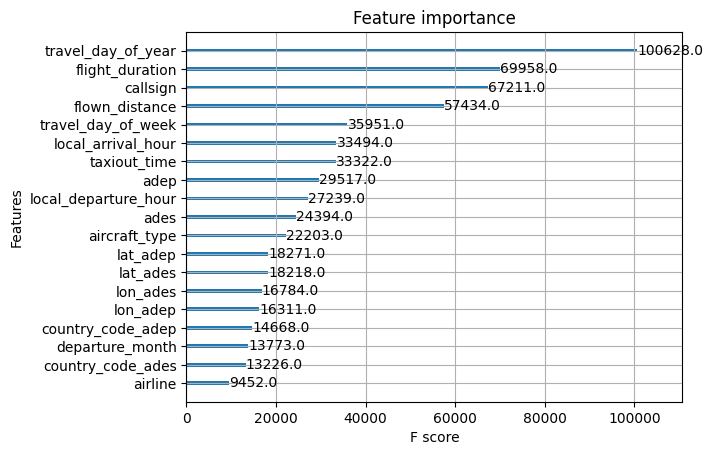

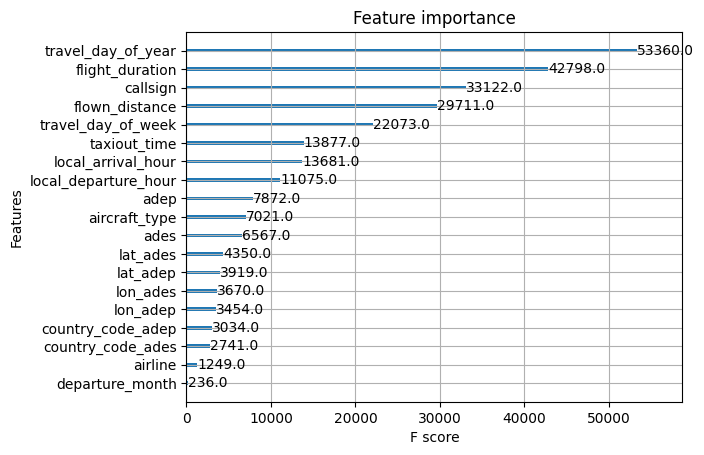

In [204]:
# print both models importance

plot_importance(model_wtc_0)

plot_importance(model_wtc_1)

In [205]:
# compute relative error for each model (wtc_0 & wtc_1)

true_y_wtc_0 = y_test[X_test["wtc"] == 0] 
relative_error = abs(true_y_wtc_0 - y_pred_wtc_0[X_test["wtc"]==0]) / true_y_wtc_0

average_relative_error = relative_error.mean()

print(f"Average relative error for wtc_0: {average_relative_error}")


true_y_wtc_1 = y_test[X_test["wtc"] == 1]
relative_error = abs(true_y_wtc_1 - y_pred_wtc_1[X_test["wtc"]==1]) / true_y_wtc_1

average_relative_error = relative_error.mean()

print(f"Average relative error for wtc_1: {average_relative_error}")

# compute relative error for the initial model

relative_error = abs(y_test - y_pred) / y_test

average_relative_error = relative_error.mean()

print(f"Average relative error for the initial model: {average_relative_error}")

# compute relative error for the aggregate model

relative_error = abs(y_test - y_pred_aggregate) / y_test

average_relative_error = relative_error.mean()

print(f"Average relative error for the aggregate model: {average_relative_error}")

seuil = 0.05

# print proportion of wtc_1 with relative error > 0.1

relative_error = abs(true_y_wtc_1 - y_pred_wtc_1[X_test["wtc"]==1]) / true_y_wtc_1

proportion = (relative_error < seuil).sum() / relative_error.shape[0]

print(f"Proportion of wtc_1 with relative error < {seuil}: {proportion}")

# print proportion of wtc_0 with relative error > 0.1

relative_error = abs(true_y_wtc_0 - y_pred_wtc_0[X_test["wtc"]==0]) / true_y_wtc_0

proportion = (relative_error < seuil).sum() / relative_error.shape[0]

print(f"Proportion of wtc_0 with relative error < {seuil}: {proportion}")

# print proportion of aggregate model with relative error > 0.1

relative_error = abs(y_test - y_pred_aggregate) / y_test

proportion = (relative_error < seuil).sum() / relative_error.shape[0]

# print proportion of initial model with relative error > 0.1

relative_error = abs(y_test - y_pred) / y_test

proportion = (relative_error < seuil).sum() / relative_error.shape[0]

print(f"Proportion of aggregate model with relative error < {seuil}: {proportion}")


Average relative error for wtc_0: 0.027850207311380434
Average relative error for wtc_1: 0.023855726277642177
Average relative error for the initial model: 0.027588337491477172
Average relative error for the aggregate model: 0.027288546560448497
Proportion of wtc_1 with relative error < 0.05: 0.888089425671335
Proportion of wtc_0 with relative error < 0.05: 0.8303306775420968
Proportion of aggregate model with relative error < 0.05: 0.8375668449197861
